# Starting off

### Importing and Splitting

In [1]:
#importing all the necessary code
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [30]:
# Importing the files
train_data = pd.read_csv('train.csv')

In [31]:
target_y = train_data['Survived'] # Target Variable
features_x = train_data.drop(columns=['Survived', 'PassengerId', 'Ticket'])

In [32]:
features_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [33]:
from sklearn.model_selection import train_test_split

data_x, X_test, data_y, y_test = train_test_split(
    features_x, target_y, test_size=0.2, random_state=42, stratify=target_y
)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Looking at Null values within the dataset

In [36]:
#cheching for null values
data_x.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         137
SibSp         0
Parch         0
Fare          0
Cabin       552
Embarked      2
dtype: int64

In [37]:
# note only three columns have missing values : Age, Cabin, Embarked
# if we look at the missing values from Embarked, 

data_x[data_x['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN
61,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN


In [38]:
# Looking at the Null values from Cabin, 
data_x.loc[data_x['Cabin'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,"Lam, Mr. Ali",male,NaN,0,0,56.4958,NaN,S
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0000,NaN,S
855,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,9.3500,NaN,S
801,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,26.2500,NaN,S
652,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8.4333,NaN,S
...,...,...,...,...,...,...,...,...,...
476,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,21.0000,NaN,S
359,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,7.8792,NaN,Q
258,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C
736,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,34.3750,NaN,S


In [39]:
data_x.loc[ data_x['Age'].isna() ]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,"Lam, Mr. Ali",male,NaN,0,0,56.4958,NaN,S
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0000,NaN,S
527,1,"Farthing, Mr. John",male,NaN,0,0,221.7792,C95,S
557,1,"Robbins, Mr. Victor",male,NaN,0,0,227.5250,NaN,C
828,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...
277,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,0.0000,NaN,S
451,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,19.9667,NaN,S
680,3,"Peters, Miss. Katie",female,NaN,0,0,8.1375,NaN,Q
359,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,7.8792,NaN,Q


After looking at the missing values, I believe the best course of action to fix it is as follows :
- For Age, we can use Imputer with median value
- For Embarked, we fill the most common value
- For Cabin, I will droping the null values and extracting the cabin number. 

# Visualizing the Data Set

Lets look at some graphs of the dataset and better understand the relation of the attributes here

<Axes: >

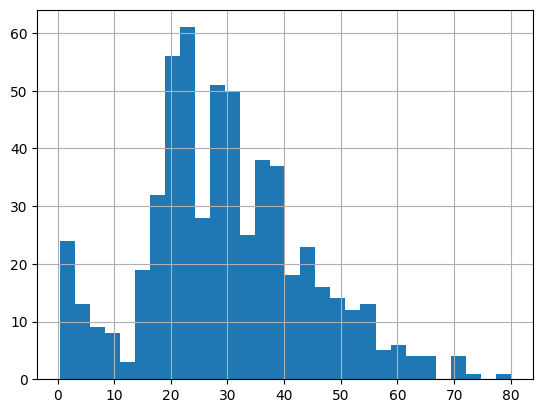

In [40]:
data_x['Age'].hist(bins=30)

<Axes: >

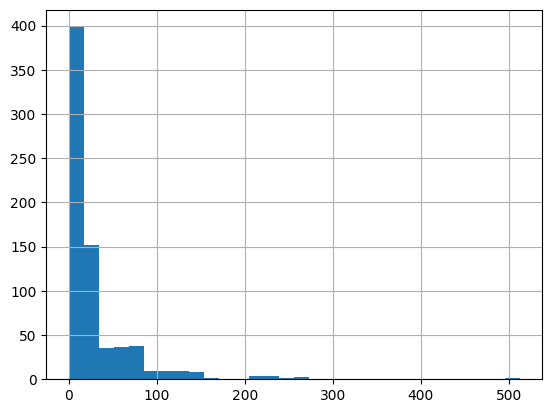

In [41]:
data_x['Fare'].hist(bins=30)

From here we can notice that : 
- The age column is fairly balanced. Thus we can leave it as is. 
- But the Fare column is highly skewed. Although using a log transfromation would be ideal, I am using random forests. They tend to handle skewed data well. But, as a cautionary step, I will make sure to remove any outliers. 

<Axes: >

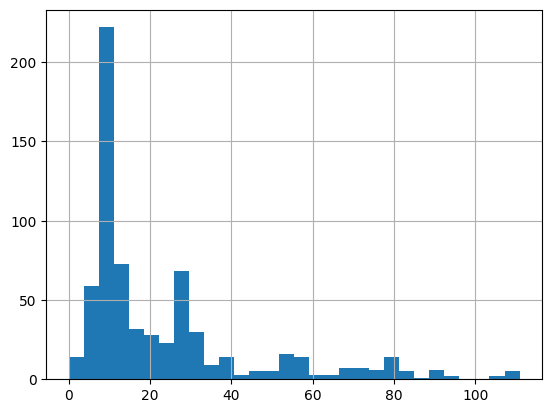

In [42]:
upper_limit = data_x['Fare'].quantile(0.95)
col = data_x.loc[data_x['Fare'] < upper_limit]
col['Fare'].hist(bins=30)

Lets look at the correlation and understand the attributes better

In [43]:
data_x.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [44]:
data_x.insert(0, 'Survived', data_y)


In [45]:
correlation_table = data_x.drop(columns=['Sex','Cabin','Embarked', 'Name'])
correlation_table.corr()['Survived'].abs().sort_values(ascending=False)

Survived    1.000000
Pclass      0.348007
Fare        0.275499
Age         0.084268
Parch       0.084178
SibSp       0.026115
Name: Survived, dtype: float64

In [46]:
data_x.drop(columns=['Survived'], inplace=True)

# Data Pipeline

### Model 1 Pipeline 

Once again lets look at the data.

In [29]:
data_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,"Lam, Mr. Ali",male,NaN,0,0,56.4958,NaN,S
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0000,NaN,S
527,1,"Farthing, Mr. John",male,NaN,0,0,221.7792,C95,S
855,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,9.3500,NaN,S
801,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,26.2500,NaN,S


Now lets create the pipeline to create the data. Here, we want to make the following changes : 
- One hot encoder to vectorize Columns Sex and Embarked
- A custom encoder to encode the column deck
- Use Imputer to fill any missing values. 

We want to incorporate all of this into a full pipeline. 

In [47]:
# This is the custom encoder to covert the values for the deck column.
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class DeckEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping=None):
        # Your desired mapping; 'U' means unknown/missing and maps to 0
        if mapping is None:
            mapping = {'A':4, 'B':4, 'C':4, 'D':3, 'E':3, 'F':2, 'G':2, 'T':1, 'U':0}
        self.mapping = mapping
        self._unknown_value = mapping.get('U', 0)

    def fit(self, X, y=None):
        return self  # stateless

    def transform(self, X):
        # X may arrive as a 2D array; flatten to 1D
        s = pd.Series(np.asarray(X).ravel(), dtype="string")

        # Extract the first alphabetic character as the deck letter
        # (robust to values like "C123 C125"; yields NaN if none found)
        letters = s.str.extract(r'([A-Za-z])', expand=False)

        # Replace missing/none with 'U' for unknown
        letters = letters.fillna('U')

        # Map letters to scores; anything unmapped → 'U' score
        out = letters.map(self.mapping).fillna(self._unknown_value)

        # Return 2D array as sklearn expects
        return out.to_numpy().reshape(-1, 1)

The next custom transfomer is going to focus on building the following featuers into the data : 
- 1. FamilySize = 1 + SibSp + Parch (Keeps account of total number of people in one family)
- 2. IsAlone = 0 (If not alone) or 1(If Alone) (We are going to be using FamilySize for this one)
- 3. Title = extract from Name (Mr, Miss, etc.)
- 4. FarePerPerson = Fare / FamilySize

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

class FamilyFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self  # stateless

    def transform(self, X):
        X = X.copy()
        # 1. FamilySize = 1 + SibSp + Parch
        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1

        # 2. IsAlone = 0 (If not alone) or 1(If Alone)
        X['IsAlone'] = (X['FamilySize'] == 1).astype(int)

        # 3. Title = extract from Name (Mr, Miss, etc.)
        X['Title'] = X['Name'].str.split(', ')
        X['Title'] = X['Title'].str[1]
        X['Title'] = X['Title'].str.split('.')
        X['Title'] = X['Title'].str[0]

        # 4. FarePerPerson = Fare / FamilySize
        X['FarePerPerson'] = X['Fare'] / X['FamilySize']
        
        #Dropping the Name column as it is no longer needed
        X.drop(columns=['Name'], inplace=True)

        return X

In [54]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols =  ['Sex', 'Embarked', 'Title']
deck_cols = ['Cabin']

In [52]:
data_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,"Lam, Mr. Ali",male,NaN,0,0,56.4958,NaN,S
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0000,NaN,S
527,1,"Farthing, Mr. John",male,NaN,0,0,221.7792,C95,S
855,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,9.3500,NaN,S
801,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,26.2500,NaN,S


In [55]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

feature_engineer = FamilyFeatureTransformer()

numpipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ]
)

catpipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

deckpipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='U')),
        ('deckenc', DeckEncoder(
            mapping={'A':4,'B':4,'C':4,'D':3,'E':3,'F':2,'G':2,'T':1,'U':0}
        ))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numpipeline, num_cols),
        ('cat', catpipeline, cat_cols),
        ('dec', deckpipeline, deck_cols)
    ], remainder='drop'
)

model1_pipeline = Pipeline(
    steps=[
        ('feature_engineering', FamilyFeatureTransformer()),
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42, max_depth=7))
    ]
)

model1_pipeline.fit(data_x, data_y)


,steps,"[('feature_engineering', ...), ('preprocessor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
import gc
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted

for obj in gc.get_objects():
    try:
        if isinstance(obj, Pipeline):
            name = None
            for k,v in globals().items():
                if v is obj:
                    name = k; break
            try:
                check_is_fitted(obj)
                status = "fitted"
            except Exception:
                status = "NOT fitted"
            print(f"Pipeline {name or '(unreferenced)'} -> {status} (id={id(obj)})")
    except Exception:
        pass

Pipeline catpipeline -> NOT fitted (id=5590970000)
Pipeline deckpipeline -> NOT fitted (id=5590972784)
Pipeline _ -> fitted (id=5590970288)
Pipeline obj -> fitted (id=5590191984)
Pipeline obj -> fitted (id=5590201920)
Pipeline obj -> NOT fitted (id=5590200528)
Pipeline _27 -> fitted (id=5565463184)
Pipeline obj -> NOT fitted (id=5565741376)
Pipeline obj -> NOT fitted (id=5565741040)
Pipeline obj -> NOT fitted (id=5565737728)
Pipeline obj -> NOT fitted (id=5565735664)
Pipeline obj -> NOT fitted (id=5565461552)
Pipeline obj -> NOT fitted (id=5564545152)
Pipeline obj -> NOT fitted (id=4910776224)
Pipeline obj -> NOT fitted (id=5565463664)
Pipeline obj -> fitted (id=5565460016)
Pipeline obj -> fitted (id=5565462416)
Pipeline obj -> NOT fitted (id=5589486272)
Pipeline obj -> NOT fitted (id=5589492896)
Pipeline obj -> NOT fitted (id=5589492704)
Pipeline obj -> NOT fitted (id=5589490688)
Pipeline obj -> NOT fitted (id=5589493472)
Pipeline obj -> NOT fitted (id=5589491696)
Pipeline obj -> NOT 

### Model 2 Pipeline (AdaBoosting)

Here we are going to use AdaBoosting to predict the values for the function.

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

model2_pipeline = Pipeline(
    steps=[
        ('feature_engineering', FamilyFeatureTransformer()),
        ('preprocessor', preprocessor),
        ('model', AdaBoostClassifier( DecisionTreeClassifier(max_depth=1),
            random_state=42, n_estimators=100, learning_rate=0.5))
    ]
)

model2_pipeline.fit(data_x, data_y)

,steps,"[('feature_engineering', ...), ('preprocessor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Model 3 Pipeline ( Gradient Boosting using XGBOOST )

In this case, we will be using Gradient Boosting to train our model. We will be using sklearn for this part because it it is easier to fit into the pipelines.

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
model3_pipeline = Pipeline(
    steps=[
        ('feature_engineering', FamilyFeatureTransformer()),
        ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.01, max_depth=2))
    ]
)

model3_pipeline.fit(data_x, data_y)

,steps,"[('feature_engineering', ...), ('preprocessor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Finding the best parameters for gradient Boosting.

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [2, 3, 4]
}
search = GridSearchCV(model3_pipeline, param_grid, cv=5)
search.fit(data_x, data_y)
print(search.best_params_, search.best_score_)


/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packa

{'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__n_estimators': 200} 0.823076923076923


# Evaluating the Models

### Evaluating Model 1

In [100]:
from sklearn.model_selection import cross_val_score

print('Model 1 Cross-Validation Scores:', cross_val_score(model1_pipeline, X_test, y_test, cv=5, scoring='accuracy'))

/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packa

Model 1 Cross-Validation Scores: [0.83333333 0.66666667 0.83333333 0.80555556 0.77142857]


/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, roc_auc_score

y_pred1 = model1_pipeline.predict(X_test)
roc_auc_score(y_test, y_pred1)

/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.8059288537549407

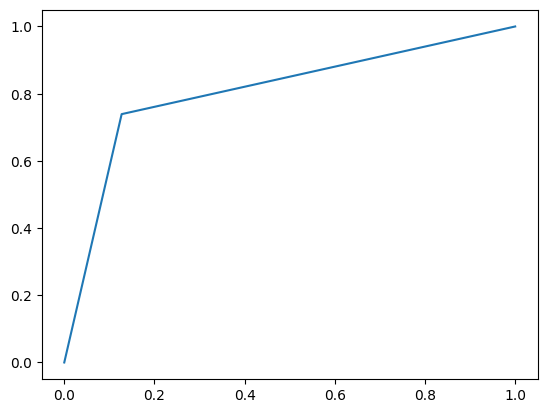

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.plot(fpr, tpr,)

In [103]:
confusion_matrix(y_test, y_pred1)

array([[96, 14],
       [18, 51]])

### Evaluating Model 2

In [104]:
from sklearn.model_selection import cross_val_score

print('Model 2 Cross-Validation Scores:', cross_val_score(model2_pipeline, X_test, y_test, cv=5, scoring='accuracy'))

/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packa

Model 2 Cross-Validation Scores: [0.86111111 0.69444444 0.83333333 0.77777778 0.85714286]


/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, roc_auc_score

y_pred2 = model2_pipeline.predict(X_test)
roc_auc_score(y_test, y_pred2)

/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.7732542819499342

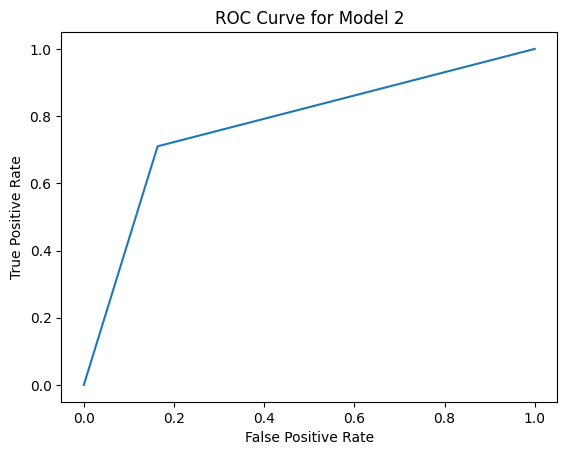

In [106]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 2')
plt.show()

### Evaluating Model 3

In [107]:
from sklearn.model_selection import cross_val_score

print('Model 3 Cross-Validation Scores:', cross_val_score(model3_pipeline, X_test, y_test, cv=5, scoring='accuracy'))

/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/numpy2/lib/python3.10/site-packa

Model 3 Cross-Validation Scores: [0.77777778 0.69444444 0.83333333 0.80555556 0.82857143]


/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, roc_auc_score

y_pred3 = model3_pipeline.predict(X_test)
roc_auc_score(y_test, y_pred3)

/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.7624505928853755

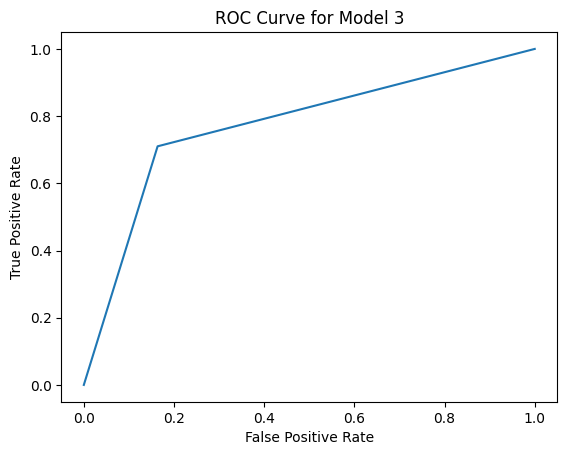

In [109]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 3')
plt.show()

### Comparing the Three Models

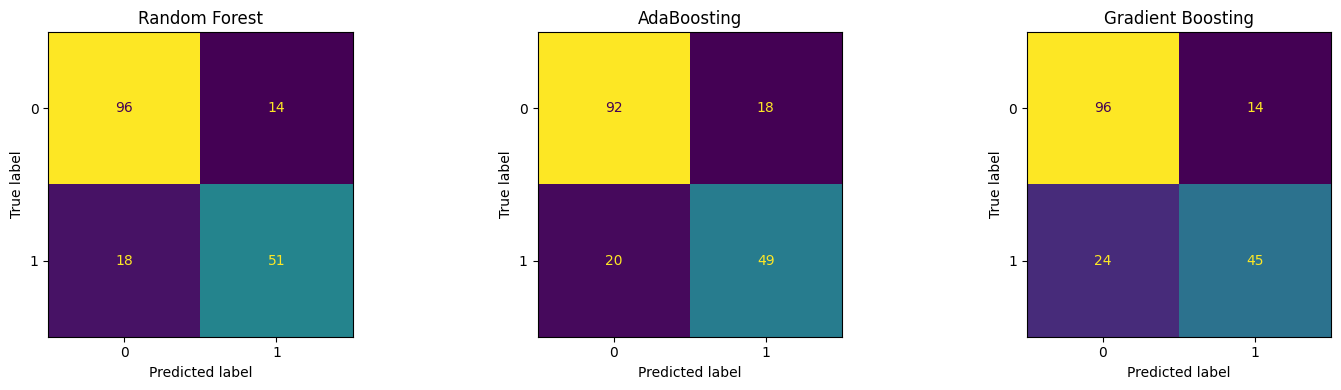

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute confusion matrices
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

# Create subplot grid
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot each confusion matrix
titles = ["Random Forest", "AdaBoosting", "Gradient Boosting"]
cms = [cm1, cm2, cm3]

for ax, cm, title in zip(axes, cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

plt.tight_layout()
plt.show()


This time we can see that Random Forest is the best predictor. Hence, using it we will predict the final values. 

# Once Again Doing the submissions. 

In [114]:
testing_data = pd.read_csv('test.csv')
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [115]:
predicted = model1_pipeline.predict(testing_data)

/opt/anaconda3/envs/numpy2/lib/python3.10/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [117]:
submission2 = pd.DataFrame({
    'PassengerId': testing_data['PassengerId'],
    'Survived': predicted
})

submission2.to_csv('submission3.csv', index=False)